In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12,4)

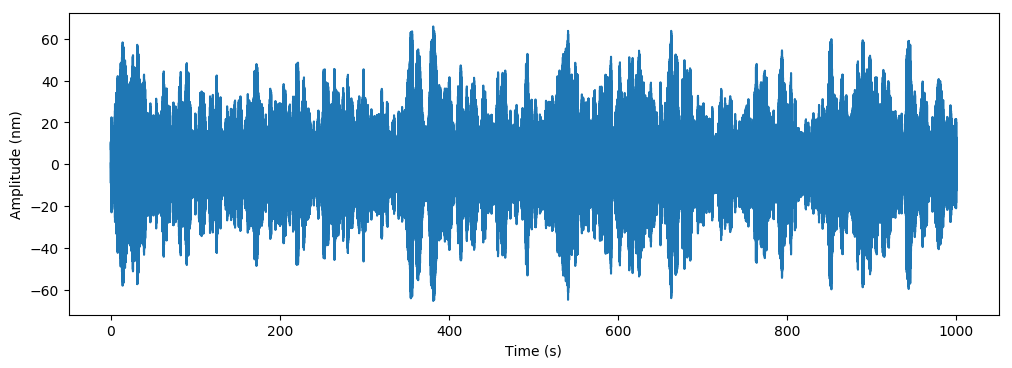

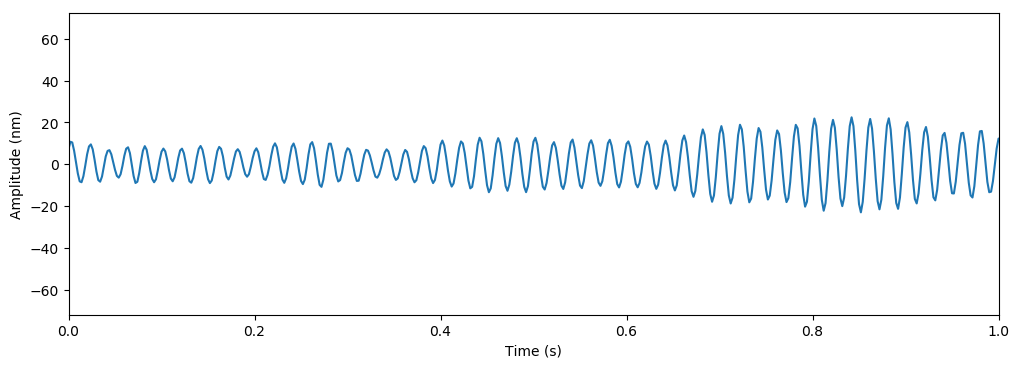

In [24]:
# Sampling rate
fs = 500

# Total time trace length in seconds
T = 1000

# mechanical frequency in Hz 
f0 = 50 

# Q of resonator
Q = 1000 

# Our time vector
t = np.arange(0,T,1/fs)

# A randomly fluctuating force
np.random.seed(0)
F = np.random.normal(0,1,len(t))

# x(t) is determined by the convolution of the fluctuating force
# with the Harmonic Oscillator transfer function
F_t = np.fft.fft(F)
f = np.fft.fftfreq(len(F), 1/fs)

# The HO transfer (response) function 
H = f0**2 / (f0**2 - f**2 + 1j*f*f0/Q)
x_t = F_t * H

# Inverse FT. Note that x is still a real-valued function, but 
# is of imaginary type, so we have to use np.real to avoid complaints
# from matplotlib during plotting
x = np.real(np.fft.ifft(x_t))

plt.plot(t,x)
plt.ylabel("Amplitude (nm)")
plt.xlabel("Time (s)")
plt.show()

plt.plot(t,x)
plt.xlim((0,1))
plt.ylabel("Amplitude (nm)")
plt.xlabel("Time (s)")
plt.show()

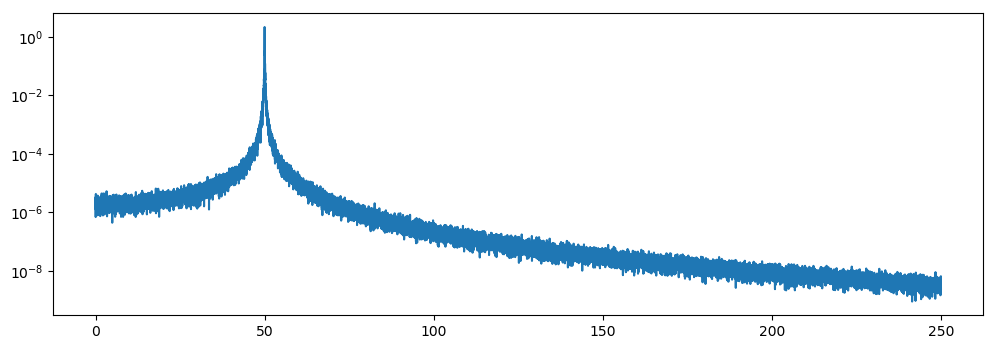

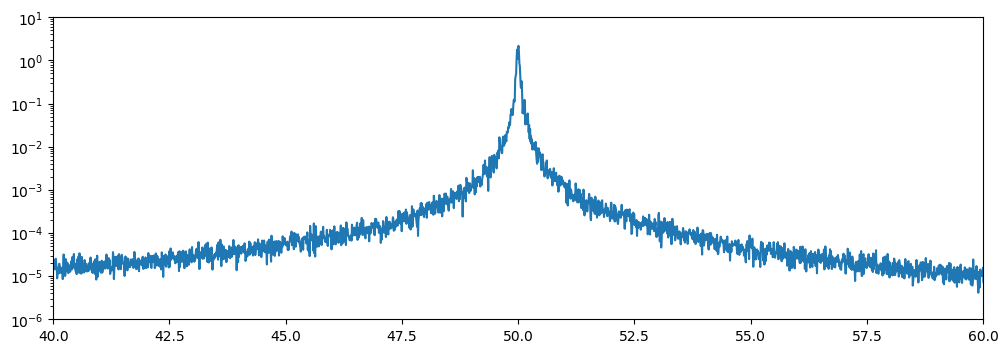

In [13]:
# Now output spectrum as well

def decimate(x, n):
    end =  n * int(len(x)/n)
    return np.mean(x[:end].reshape(-1, n), 1)

spec = np.abs(x_t)**2/(fs*T)**2

win = 10
f_spec = decimate(f, win)
spec = decimate(spec, win)

def p(x):
    return x[0:int(len(x)/2)]
    
plt.plot(p(f_spec), p(spec))
plt.yscale('log')
plt.show()

plt.plot(p(f_spec), p(spec))
plt.xlim((40,60))
plt.ylim((1e-6,1e1))
plt.yscale('log')


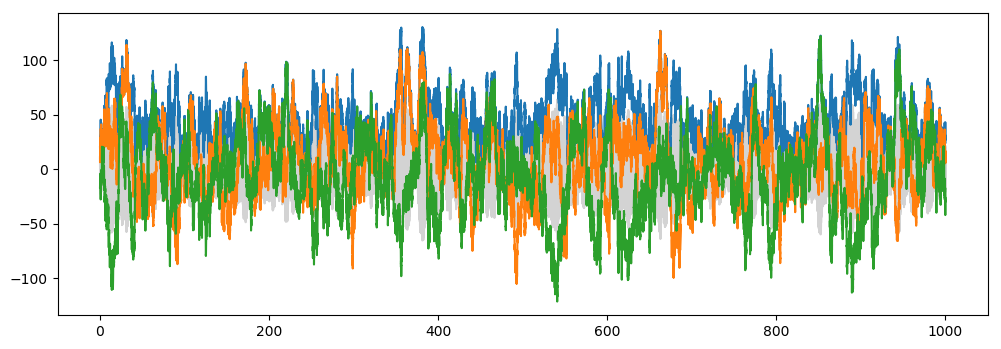

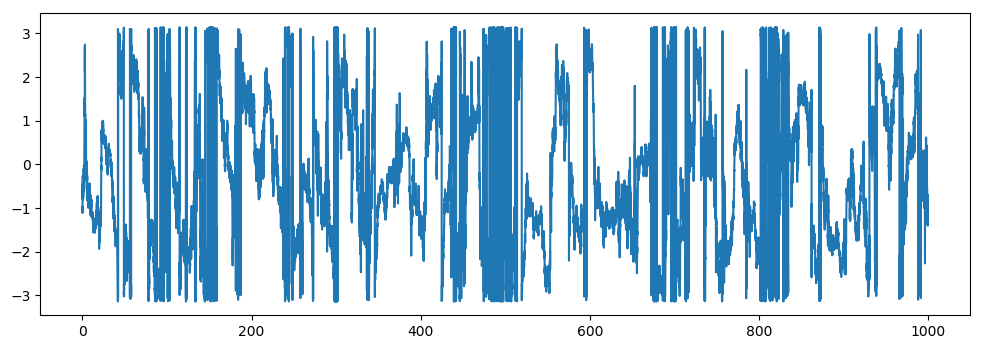

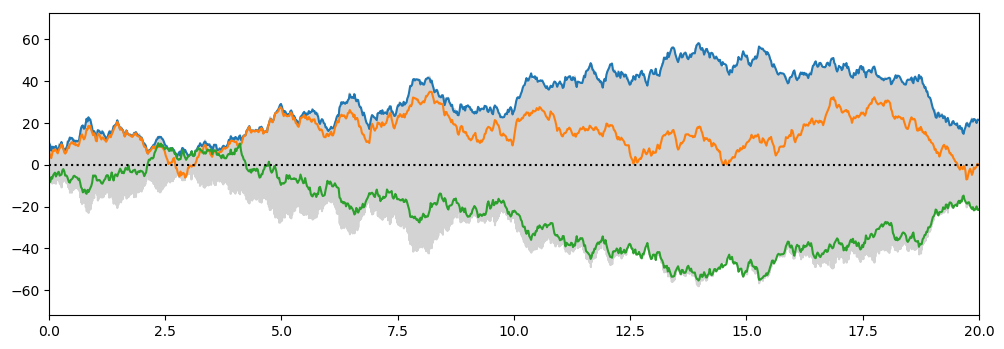

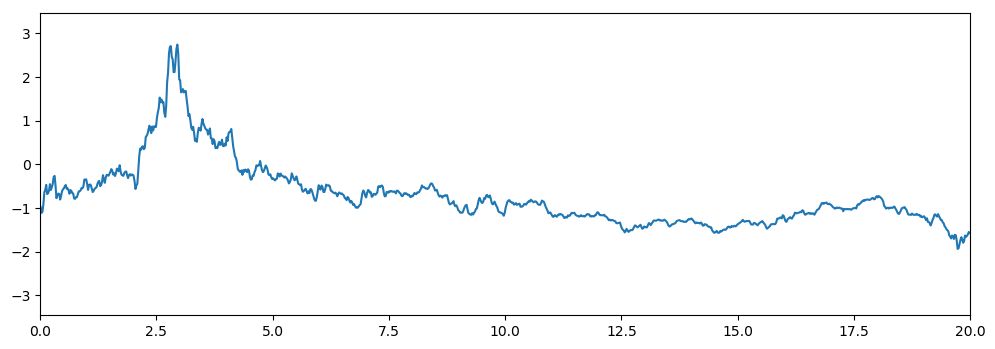

In [23]:
# Let's try to make quadrature plots

# First, feed the signal into a mixer, frequency shifting one of the
# +/- f0 peaks down to zero frequency (the other one gets shifted
# to 2f0)

# Why the factor of two? Of course! From 1/2(1-cos(2\omega))!
f_d = 50
x_demod = x * np.exp(-1j*f_d*2*np.pi*t)*2

N = 10
x_demod_dec = decimate(x_demod, N)
I_dec = np.real(x_demod_dec)
Q_dec = np.imag(x_demod_dec)
A_dec = np.abs(x_demod_dec)
Ph_dec = np.angle(x_demod_dec)
t_dec = decimate(t, N)

plt.plot(t,x, c='lightgrey')
plt.plot(t_dec, A_dec*2)
plt.plot(t_dec, I_dec*2)
plt.plot(t_dec, Q_dec*2)
plt.show()

plt.plot(t_dec, Ph_dec)
plt.show()

plt.plot(t,x, c='lightgrey')
plt.plot(t_dec, A_dec)
plt.plot(t_dec, I_dec)
plt.plot(t_dec, Q_dec)
plt.axhline(0,c='k', ls=':')
plt.xlim((0,20))
plt.show()

plt.plot(t_dec, Ph_dec)
plt.xlim((0,20))
plt.show()
